In [30]:
data.head(5)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,144.968804,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [2]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = pd.read_csv("LoanApprovalPrediction.csv")


In [29]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 0


In [4]:
# Dropping Loan_ID column
data.drop(['Loan_ID'],axis=1,inplace=True)


In [31]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1


<Figure size 1800x3600 with 0 Axes>

In [32]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])


In [7]:
# To find the number of columns with
# datatype==object
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 0


<Axes: >

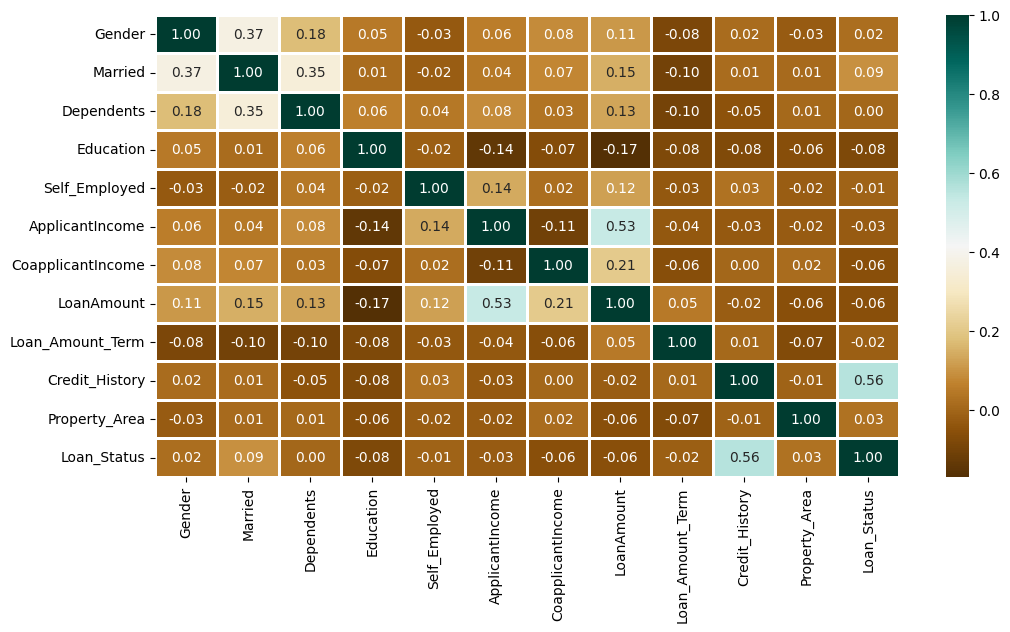

In [8]:
plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
			linewidths=2,annot=True)


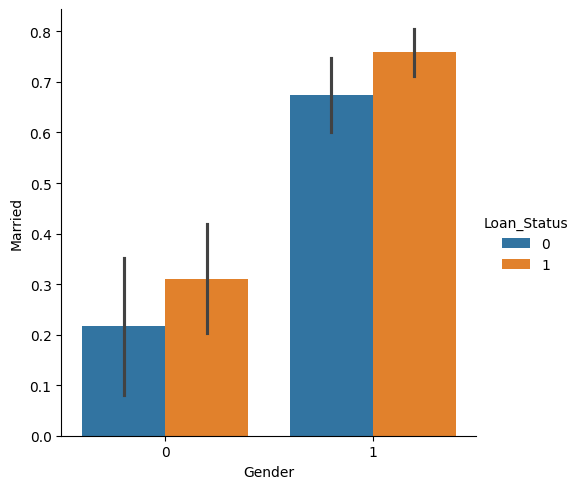

In [9]:
sns.catplot(x="Gender", y="Married",
			hue="Loan_Status",
			kind="bar",
			data=data)


In [10]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean())

data.isna().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
													test_size=0.4,
													random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((358, 11), (240, 11), (358,), (240,))

In [15]:
#KNN CLASSIFIER
#RANDOM FOREST
#SVC
#LOGISTIC REGRESSION
#DECISION TREE
#NAIVE BYERS
#XGB
#GBM

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import StackingClassifier

# Initialize base classifiers
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42))
]

# Initialize stacking classifier with a meta-classifier (Logistic Regression in this case)
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression())

# Initialize classifiers
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
svc = SVC()
lc = LogisticRegression()
dtc = DecisionTreeClassifier()
nb = GaussianNB()

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',  # for binary classification
    eval_metric='error'            # evaluation metric
)
# Initialize GBM classifier
gbm_clf = GradientBoostingClassifier(
    n_estimators=100,  # number of boosting stages
    learning_rate=0.1, # learning rate
    max_depth=3        # maximum depth of the individual estimators
)
# Initialize AdaBoost classifier
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)

# Initialize MLPClassifier (Neural Network)
nn_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, alpha=0.0001, solver='adam', random_state=42)

# Initialize base classifier (Decision Tree in this case)
base_classifier = DecisionTreeClassifier()

# Initialize Bagging Classifier
bagging_clf = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Train and print accuracy for each classifier
for clf in (rfc, knn, svc, lc, dtc, nb, xgb_clf, gbm_clf,ada_clf,nn_clf,bagging_clf,stacking_clf):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of", clf.__class__.__name__, "=", 100*metrics.accuracy_score(Y_train, Y_pred))


Accuracy score of RandomForestClassifier = 98.04469273743017
Accuracy score of KNeighborsClassifier = 78.49162011173185
Accuracy score of SVC = 68.71508379888269
Accuracy score of LogisticRegression = 80.44692737430168
Accuracy score of DecisionTreeClassifier = 100.0
Accuracy score of GaussianNB = 79.05027932960894
Accuracy score of XGBClassifier = 100.0
Accuracy score of GradientBoostingClassifier = 91.34078212290503
Accuracy score of AdaBoostClassifier = 84.91620111731844
Accuracy score of MLPClassifier = 42.17877094972067
Accuracy score of BaggingClassifier = 98.60335195530726
Accuracy score of StackingClassifier = 89.66480446927375


In [17]:
from sklearn.metrics import classification_report

# Making predictions on the testing set
for clf in (rfc, knn, svc, lc, dtc, nb, xgb_clf, gbm_clf,ada_clf,nn_clf,bagging_clf,stacking_clf):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of", clf.__class__.__name__, "=", 100 * accuracy_score(Y_test, Y_pred))
    # Classification report
    print("Classification Report:")
    print(classification_report(Y_test, Y_pred))


Accuracy score of RandomForestClassifier = 82.5
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.62      0.68        73
           1       0.85      0.92      0.88       167

    accuracy                           0.82       240
   macro avg       0.80      0.77      0.78       240
weighted avg       0.82      0.82      0.82       240

Accuracy score of KNeighborsClassifier = 63.74999999999999
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.26      0.30        73
           1       0.71      0.80      0.75       167

    accuracy                           0.64       240
   macro avg       0.54      0.53      0.53       240
weighted avg       0.61      0.64      0.62       240

Accuracy score of SVC = 69.16666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

# List of models
models = [rfc, knn, svc, lc, dtc, nb, xgb_clf, gbm_clf,ada_clf,nn_clf,bagging_clf,stacking_clf]  # Replace model1, model2, ..., modelN with your actual models

# List of model names
model_names = ['Random Forest', 'KNN', 'SVC','Logistic regression','Decision Trees','Naive byers','XGB','GBM','ADA Boost','Neural network','Bagging','Stacking']  # Replace Model 1, Model 2, ..., Model N with actual model names

# Initialize lists to store performance metrics
training_scores = []
testing_scores = []
mse_values = []
rmse_values = []

# Loop over each model
for model, model_name in zip(models, model_names):
    # Train the model
    model.fit(X_train, Y_train)

    # Calculate training and testing set scores
    training_set_score = model.score(X_train, Y_train)
    testing_set_score = model.score(X_test, Y_test)

    # Make predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate MSE and RMSE for training set
    mse_train = mean_squared_error(Y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)

    # Calculate MSE and RMSE for testing set
    mse_test = mean_squared_error(Y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)

    # Append performance metrics to lists
    training_scores.append(training_set_score)
    testing_scores.append(testing_set_score)
    mse_values.append(mse_test)
    rmse_values.append(rmse_test)

    # Print the model performance summary
    print("Model Performance Summary for", model_name)
    print("Training set score:", training_set_score)
    print("Testing set score:", testing_set_score)
    print("MSE:", mse_test)
    print("RMSE:", rmse_test)
    print("\n")

# Print overall summary
print("Overall Summary:")
print("Model\tTraining set score\tTesting set score\tMSE\tRMSE")
for model_name, training_score, testing_score, mse, rmse in zip(model_names, training_scores, testing_scores, mse_values, rmse_values):
    print("{}\t{}\t{}\t{}\t{}".format(model_name, training_score, testing_score, mse, rmse))


Model Performance Summary for Random Forest
Training set score: 0.9804469273743017
Testing set score: 0.825
MSE: 0.175
RMSE: 0.4183300132670378


Model Performance Summary for KNN
Training set score: 0.7849162011173184
Testing set score: 0.6375
MSE: 0.3625
RMSE: 0.6020797289396148


Model Performance Summary for SVC
Training set score: 0.6871508379888268
Testing set score: 0.6916666666666667
MSE: 0.30833333333333335
RMSE: 0.5552777082985894


Model Performance Summary for Logistic regression
Training set score: 0.8044692737430168
Testing set score: 0.8083333333333333
MSE: 0.19166666666666668
RMSE: 0.43779751788545657


Model Performance Summary for Decision Trees
Training set score: 1.0
Testing set score: 0.675
MSE: 0.325
RMSE: 0.570087712549569


Model Performance Summary for Naive byers
Training set score: 0.7905027932960894
Testing set score: 0.8166666666666667
MSE: 0.18333333333333332
RMSE: 0.4281744192888376


Model Performance Summary for XGB
Training set score: 1.0
Testing set s

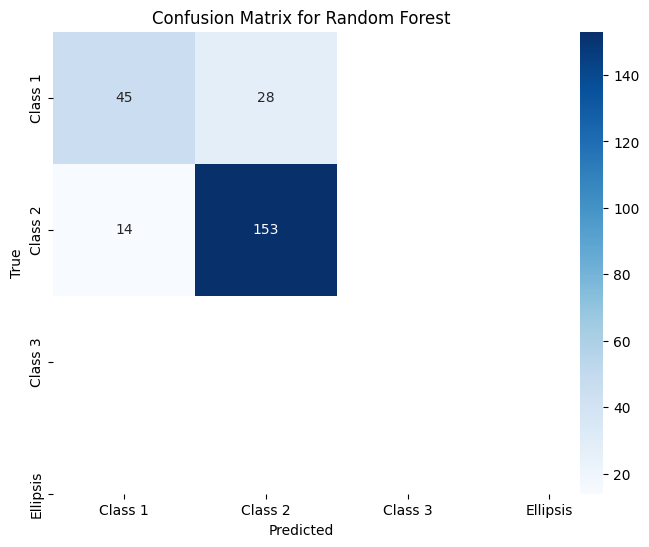

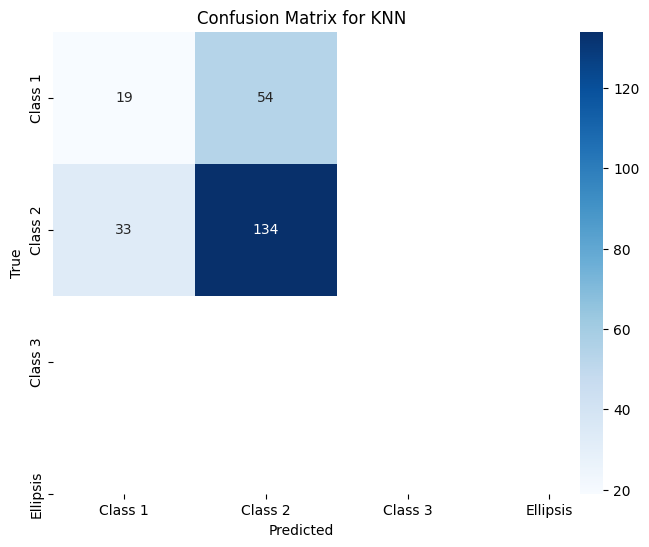

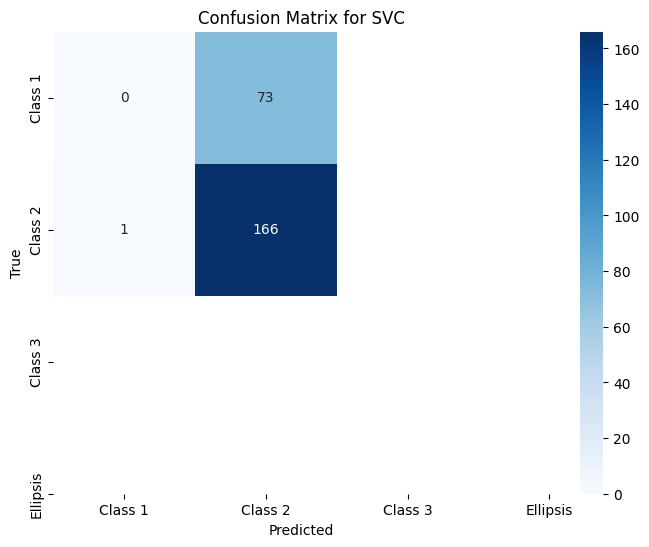

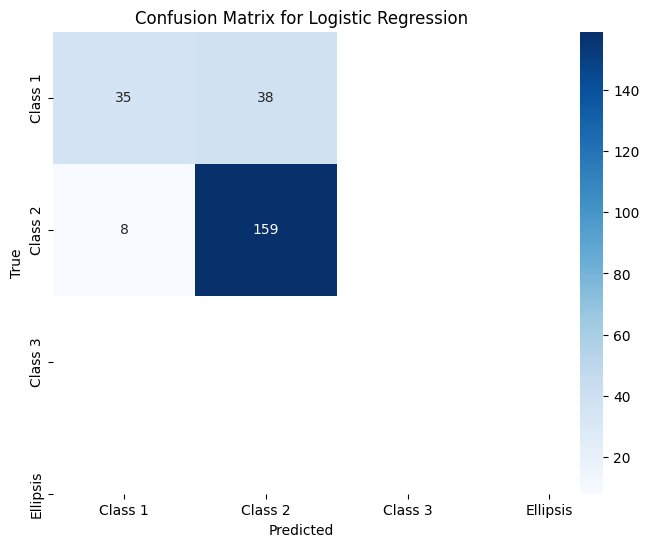

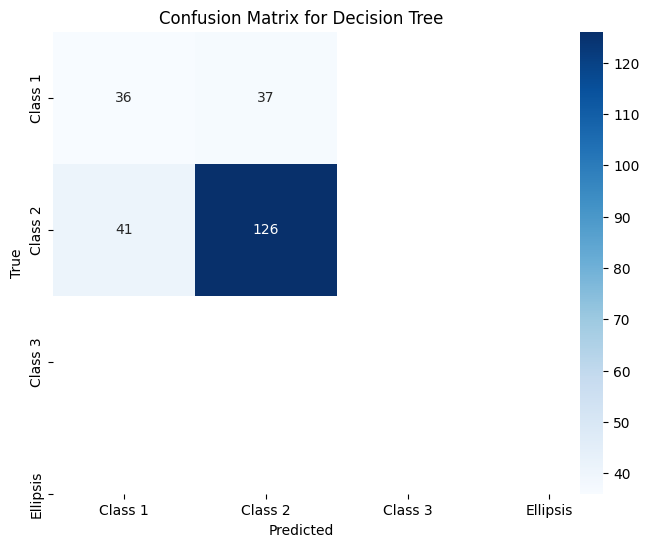

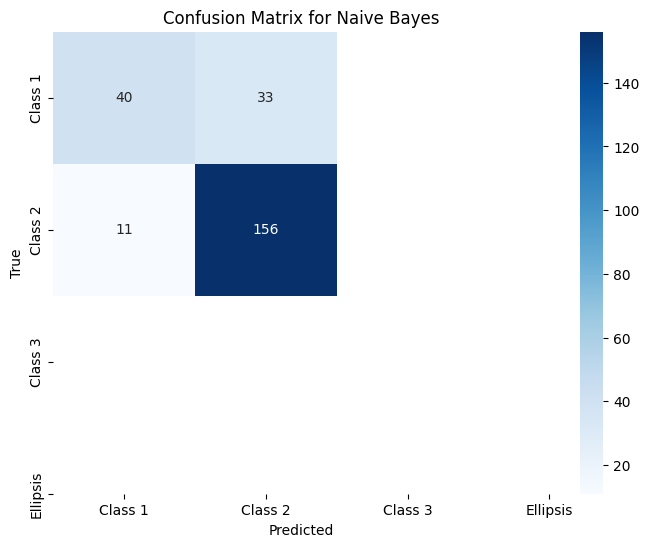

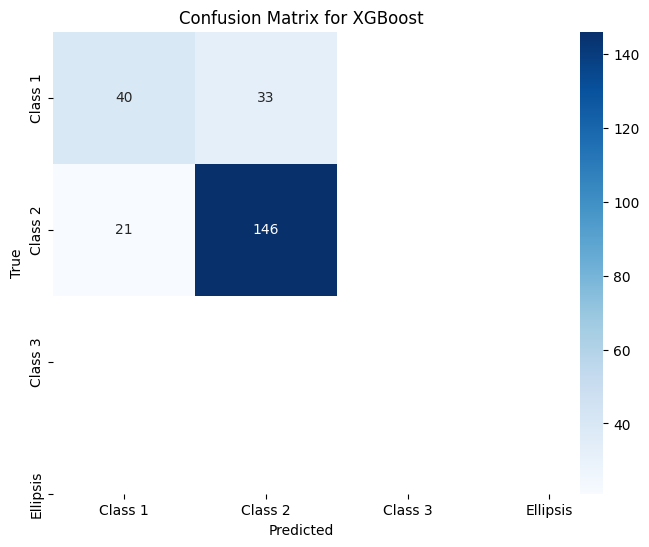

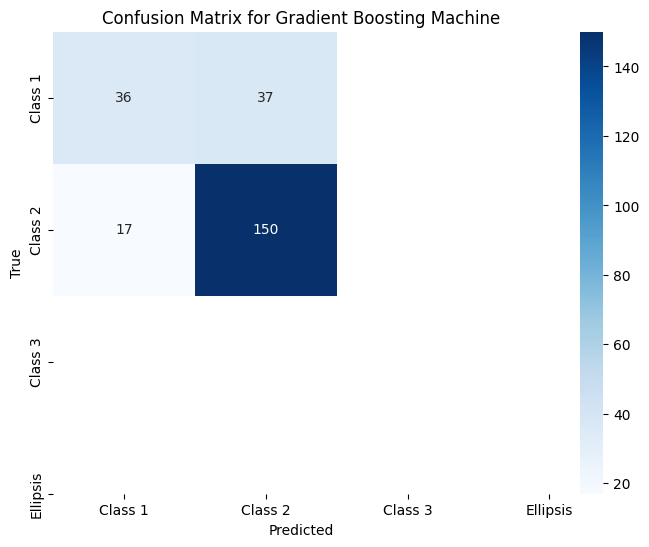

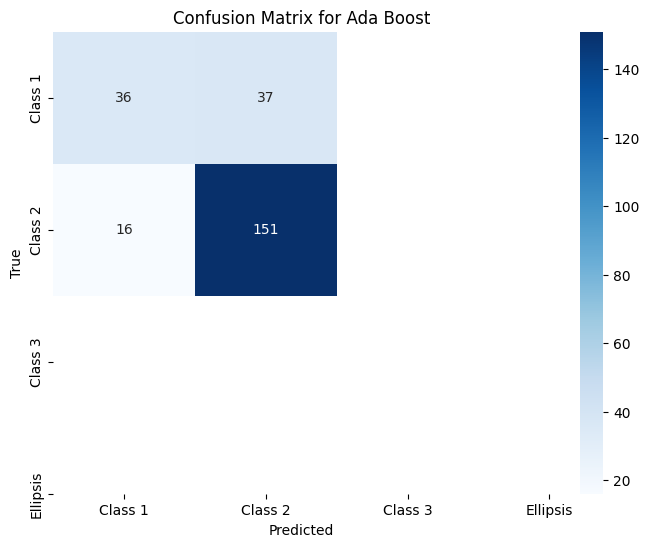

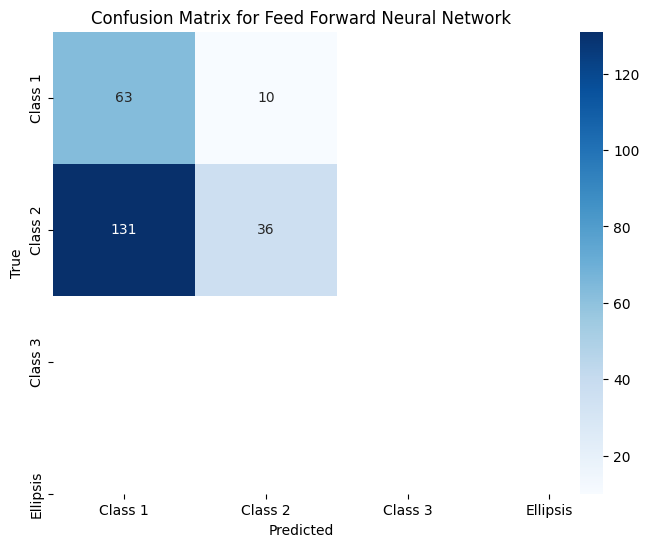

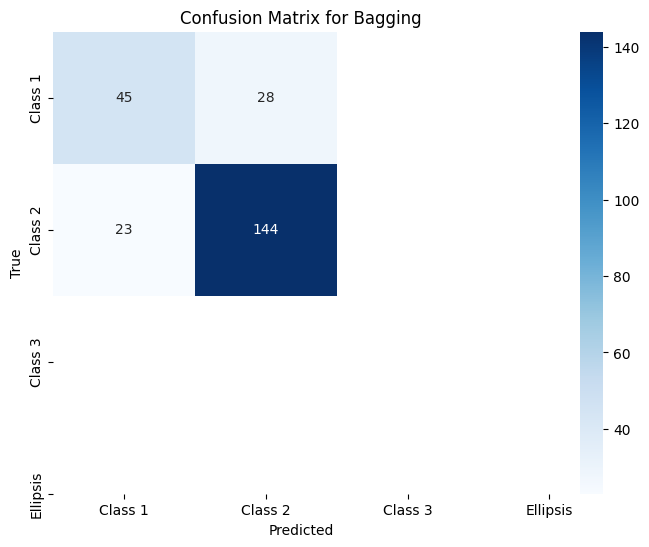

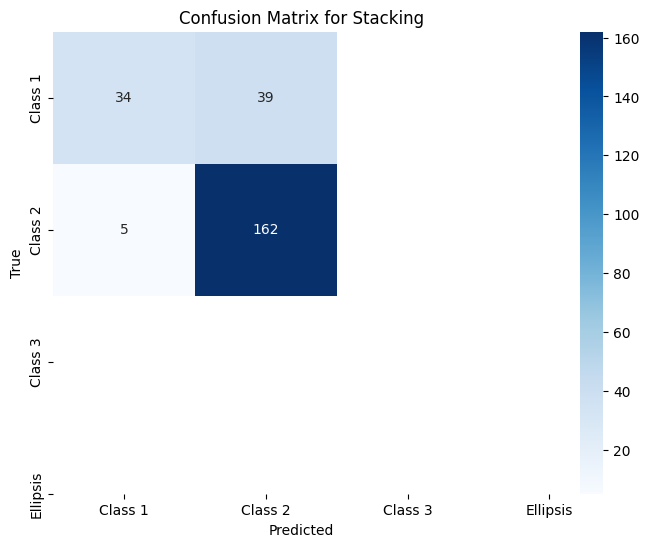

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define class labels
class_labels = ['Class 1', 'Class 2', 'Class 3', ...]  # Replace with your actual class labels

# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')

# List of models and their corresponding predictions
models = [rfc, knn, svc, lc, dtc, nb, xgb_clf, gbm_clf, ada_clf, nn_clf, bagging_clf, stacking_clf]
model_names = ['Random Forest', 'KNN', 'SVC', 'Logistic Regression', 'Decision Tree',
               'Naive Bayes', 'XGBoost', 'Gradient Boosting Machine', 'Ada Boost',
               'Feed Forward Neural Network', 'Bagging', 'Stacking']
predictions = [model.predict(X_test) for model in models]

# Generate confusion matrices and plot them
for model_name, prediction in zip(model_names, predictions):
    cm = confusion_matrix(Y_test, prediction)
    plot_confusion_matrix(cm, model_name)
    plt.show()
